In [ ]:
import torch
from torch.nn import DataParallel
import tqdm.notebook as nb
from unet import ScoreNet
import math
import numpy as np
from utils import gen_geometric_progression
import visualize


In [2]:
def min_max_normalize(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    normalized_tensor = (tensor - min_val) / (max_val - min_val)
    return normalized_tensor

In [3]:
def langevin_sampling(shape, model, eps=0.0001, device=torch.device('cpu')) -> torch.Tensor:
    with torch.no_grad():
        x = torch.randn(shape, device=device)
        for i in nb.trange(10000):
            noise = torch.randn(shape, device=device)
            s = model(x)
            x = x + eps * s + math.sqrt(2 * eps) * noise
        return x


In [ ]:
def annealed_langevin_sampling(shape, model, rs: torch.Tensor, T, eps=5e-7, device=torch.device('cpu')) -> torch.Tensor:
    with torch.no_grad():
        x = torch.randn(shape, device=device)
        for r in rs:
            a = eps * (r / rs[-1]) ** 2
            for i in nb.trange(T, leave=False, desc=f'r = {r}'):
                noise = torch.randn(shape, device=device)
                s = model(x, r.repeat(x.shape[0]))
                x = x + a * .5 * s + math.sqrt(a) * noise
        return x



In [32]:
device = torch.device('cuda')
model = DataParallel(ScoreNet(source_channels=4))
model.load_state_dict(torch.load('modelp0.pt', weights_only=True))

batch = 1
rs = gen_geometric_progression(10, .1, 1000)
samples = annealed_langevin_sampling((batch, 4, 10, 10), model, rs, 10, device=device)


r = 10.0:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.95405387878418:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.908319473266602:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.86279582977295:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.817480087280273:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.77237319946289:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.727473258972168:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.682780265808105:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.638291358947754:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.59400749206543:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.549927711486816:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.506050109863281:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.462373733520508:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.418898582458496:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.375621795654297:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.332545280456543:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.289666175842285:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.246984481811523:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.204498291015625:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.16220760345459:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.120111465454102:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.078208923339844:   0%|          | 0/10 [00:00<?, ?it/s]

r = 9.0364990234375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.994979858398438:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.953651428222656:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.912513732910156:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.871563911437988:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.830803871154785:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.790229797363281:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.749842643737793:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.709640502929688:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.669623374938965:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.629790306091309:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.590140342712402:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.55067253112793:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.511385917663574:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.47227954864502:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.433353424072266:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.39460563659668:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.356036186218262:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.317644119262695:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.279427528381348:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.241387367248535:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.203521728515625:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.165830612182617:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.128311157226562:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.090965270996094:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.053791046142578:   0%|          | 0/10 [00:00<?, ?it/s]

r = 8.0167875289917:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.979953765869141:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.943289756774902:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.90679407119751:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.870465278625488:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.834303855895996:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.798308849334717:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.762479305267334:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.726813316345215:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.691312313079834:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.6559739112854:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.620798110961914:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.585783958435059:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.550930500030518:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.516237258911133:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.481703758239746:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.447328567504883:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.413111209869385:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.379051208496094:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.345147609710693:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.311400413513184:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.277807235717773:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.244368553161621:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.211084365844727:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.177952766418457:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.144972801208496:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.112144947052002:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.0794677734375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.046940326690674:   0%|          | 0/10 [00:00<?, ?it/s]

r = 7.014563083648682:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.982334136962891:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.950253486633301:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.918320178985596:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.886532783508301:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.854892253875732:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.823397159576416:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.792047023773193:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.76084041595459:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.7297773361206055:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.698856830596924:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.668078422546387:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.637441635131836:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.606945514678955:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.576589584350586:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.546372890472412:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.516294956207275:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.486355781555176:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.4565534591674805:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.426888465881348:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.397359848022461:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.367966651916504:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.338708400726318:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.309585094451904:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.280594825744629:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.251738548278809:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.223014831542969:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.194422245025635:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.165961742401123:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.137632369995117:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.109432220458984:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.081361770629883:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.0534210205078125:   0%|          | 0/10 [00:00<?, ?it/s]

r = 6.025608062744141:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.997922897338867:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.970364570617676:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.942934036254883:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.915628433227539:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.888448715209961:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.861393928527832:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.834463119506836:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.807656764984131:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.780972957611084:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.754411697387695:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.727972984313965:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.701655387878418:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.675458908081055:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.649382591247559:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.6234259605407715:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.597589015960693:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.57187032699585:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.54626989364624:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.520787239074707:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.495421886444092:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.470172882080078:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.445039749145508:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.420022010803223:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.3951191902160645:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.370331287384033:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.345656871795654:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.321096420288086:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.296647548675537:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.272312164306641:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.248088359832764:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.22397518157959:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.1999735832214355:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.176081657409668:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.152299880981445:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.128627300262451:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.1050639152526855:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.081608295440674:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.058260440826416:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.035019397735596:   0%|          | 0/10 [00:00<?, ?it/s]

r = 5.0118865966796875:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.988858699798584:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.96593713760376:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.943120956420898:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.920409202575684:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.897802352905273:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.875298500061035:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.852899074554443:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.830602169036865:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.808407306671143:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.786314964294434:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.764323711395264:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.742434024810791:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.720644474029541:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.698955059051514:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.677365303039551:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.655875205993652:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.634483337402344:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.613190174102783:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.591994285583496:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.570896148681641:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.5498948097229:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.528990268707275:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.508181095123291:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.487468242645264:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.466850280761719:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.446327209472656:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.42589807510376:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.405562877655029:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.385321617126465:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.365172863006592:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.34511661529541:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.325152397155762:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.305280685424805:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.285499572753906:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.265809535980225:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.246210098266602:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.226700782775879:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.207281112670898:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.187950134277344:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.168708324432373:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.149555206298828:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.130489349365234:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.111511707305908:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.092621326446533:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.073817253112793:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.055099964141846:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.036468505859375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 4.017922401428223:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.999462127685547:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.981086254119873:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.962794780731201:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.9445877075195312:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.926464080810547:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.90842342376709:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.8904662132263184:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.872591018676758:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.8547980785369873:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.8370871543884277:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.8194572925567627:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.801908493041992:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.784440517425537:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.76705265045166:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.7497446537017822:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.732516288757324:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.715367078781128:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.698296308517456:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.681304454803467:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.6643905639648438:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.6475539207458496:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.6307952404022217:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.6141133308410645:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.597507953643799:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.580979108810425:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.564525842666626:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.5481486320495605:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.531846523284912:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.5156190395355225:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.4994661808013916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.4833879470825195:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.4673831462860107:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.4514520168304443:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.435594081878662:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.419809103012085:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.4040963649749756:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.388456106185913:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.37288761138916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.357390880584717:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.3419651985168457:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.3266100883483887:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.311326026916504:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.296111822128296:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.2809674739837646:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.26589298248291:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.250887393951416:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.2359509468078613:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.221083164215088:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.2062838077545166:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.1915524005889893:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.1768884658813477:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.162292242050171:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.1477627754211426:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.133300304412842:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.118903875350952:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.104574203491211:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.0903098583221436:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.076111078262329:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.0619778633117676:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.0479094982147217:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.033905506134033:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.0199661254882812:   0%|          | 0/10 [00:00<?, ?it/s]

r = 3.0060906410217285:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.992279052734375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.9785308837890625:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.964845657348633:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.951223611831665:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.9376637935638428:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.924166679382324:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.910731315612793:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.897357940673828:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.8840458393096924:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.8707947731018066:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.857604503631592:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.844475269317627:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.831406354904175:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.818397045135498:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.805447816848755:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.792558193206787:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.7797272205352783:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.766955852508545:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.7542426586151123:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.7415883541107178:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.728991746902466:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.7164533138275146:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.703972339630127:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.6915488243103027:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.679182291030884:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.66687273979187:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.6546194553375244:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.642422676086426:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.630281925201416:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.618196964263916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.6061675548553467:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.59419322013855:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.5822739601135254:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.5704097747802734:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.5585997104644775:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.546844244003296:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.535142421722412:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.5234947204589844:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.5119004249572754:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.500359058380127:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.4888710975646973:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.477435827255249:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.466053009033203:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.4547226428985596:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.44344425201416:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.432217597961426:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.4210426807403564:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.409919023513794:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3988466262817383:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.387824773788452:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3768539428710938:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3659331798553467:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.35506272315979:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3442423343658447:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3334715366363525:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3227503299713135:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.3120782375335693:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.30145525932312:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.2908811569213867:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.280355453491211:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.2698781490325928:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.259449005126953:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.249067783355713:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.238734483718872:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.2284483909606934:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.218209743499756:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.2080180644989014:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.197873115539551:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.187774658203125:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.177722930908203:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.167717218399048:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.157757520675659:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.147843599319458:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.1379752159118652:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.1281521320343018:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.1183743476867676:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.1086411476135254:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.0989527702331543:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.0893092155456543:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.079709529876709:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.0701541900634766:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.060642719268799:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.051175117492676:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.041750907897949:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.03236985206604:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.0230319499969482:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.013737201690674:   0%|          | 0/10 [00:00<?, ?it/s]

r = 2.0044848918914795:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9952750205993652:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9861077070236206:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9769823551177979:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9678990840911865:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9588572978973389:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9498573541641235:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9408984184265137:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9319809675216675:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9231044054031372:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9142684936523438:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.9054733514785767:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8967185020446777:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8880038261413574:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8793292045593262:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.870694637298584:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8620996475219727:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.853543996810913:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8450278043746948:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8365507125854492:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8281126022338867:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8197131156921387:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.8113523721694946:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.803030014038086:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.794745922088623:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7864997386932373:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7782915830612183:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7701210975646973:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7619882822036743:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7538926601409912:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.745834231376648:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.737812876701355:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7298283576965332:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.721880555152893:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.7139692306518555:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.70609450340271:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6982556581497192:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6904528141021729:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6826858520507812:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6749547719955444:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6672589778900146:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6595988273620605:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6519736051559448:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6443835496902466:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6368283033370972:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.629307746887207:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6218218803405762:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6143702268600464:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.6069530248641968:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.59956955909729:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5922203063964844:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5849047899246216:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.577622890472412:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5703743696212769:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5631592273712158:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5559771060943604:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5488280057907104:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5417118072509766:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5346283912658691:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.527577519416809:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5205588340759277:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5135726928710938:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.5066183805465698:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4996960163116455:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4928056001663208:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4859468936920166:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4791196584701538:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4723236560821533:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4655590057373047:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4588254690170288:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4521228075027466:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4454509019851685:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4388096332550049:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4321988821029663:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4256186485290527:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4190685749053955:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.412548542022705:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.4060585498809814:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.399598240852356:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3931677341461182:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3867666721343994:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3803951740264893:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3740527629852295:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3677395582199097:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3614554405212402:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3552000522613525:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3489736318588257:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3427757024765015:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3366061449050903:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3304650783538818:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3243521451950073:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3182673454284668:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3122104406356812:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3061814308166504:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.3001800775527954:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2942063808441162:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2882601022720337:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2823410034179688:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.276449203491211:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2705844640731812:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2647467851638794:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.258935809135437:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2531514167785645:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2473938465118408:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.241662621498108:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2359576225280762:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2302789688110352:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2246264219284058:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2189997434616089:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.213399052619934:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2078239917755127:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.2022745609283447:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1967506408691406:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1912521123886108:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1857788562774658:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1803306341171265:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1749075651168823:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1695094108581543:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1641360521316528:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1587872505187988:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1534631252288818:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1481635570526123:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1428881883621216:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1376371383666992:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1324101686477661:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1272071599960327:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1220282316207886:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1168729066848755:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1117414236068726:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1066334247589111:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.1015489101409912:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0964877605438232:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0914499759674072:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0864351987838745:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0814435482025146:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.076474666595459:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0715287923812866:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.066605567932129:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0617051124572754:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0568269491195679:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0519713163375854:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0471378564834595:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.042326807975769:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0375378131866455:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0327707529067993:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0280256271362305:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0233021974563599:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.018600583076477:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.013920545578003:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0092620849609375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0046249628067017:   0%|          | 0/10 [00:00<?, ?it/s]

r = 1.0000091791152954:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9954145550727844:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9908410310745239:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9862885475158691:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9817569851875305:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9772462248802185:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9727562069892883:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9682868719100952:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9638379812240601:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9594095349311829:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9550014734268188:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9506136775016785:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9462460279464722:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9418984651565552:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9375708699226379:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9332630634307861:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9289751052856445:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9247069358825684:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9204583168029785:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9162291884422302:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9120195508003235:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9078291654586792:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.9036581516265869:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8995062112808228:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8953733444213867:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8912594318389893:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8871645331382751:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8830884099006653:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8790309429168701:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8749922513961792:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8709720373153687:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8669703006744385:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8629869818687439:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8590219020843506:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8550750613212585:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8511463403701782:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8472356796264648:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8433430790901184:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.839468240737915:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8356112241744995:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8317720293998718:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8279503583908081:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8241462707519531:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8203596472740173:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8165904879570007:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.812838613986969:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8091039657592773:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8053865432739258:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.8016861081123352:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7980027198791504:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.794336199760437:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7906866073608398:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7870537042617798:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7834375500679016:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7798380255699158:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7762550115585327:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7726884484291077:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7691382765769958:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7656044363975525:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.762086808681488:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7585853338241577:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7550999522209167:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7516306042671204:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.748177170753479:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7447396516799927:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.741317868232727:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7379118204116821:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7345214486122131:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7311466932296753:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7277873754501343:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7244434952735901:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.721114993095398:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7178018093109131:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.714503824710846:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7112209796905518:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7079532146453857:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7047004699707031:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.7014626860618591:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.698239803314209:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6950316429138184:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6918383240699768:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6886596083641052:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6854954957962036:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.682345986366272:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.679210901260376:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6760901808738708:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6729838848114014:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6698918342590332:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6668139100074768:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6637502312660217:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6607005596160889:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6576650142669678:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6546432375907898:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.651635468006134:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6486415266990662:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6456612944602966:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6426947712898254:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6397417783737183:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6368024349212646:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.633876621723175:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6309642791748047:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6280652284622192:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6251795291900635:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6223071217536926:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6194478869438171:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.616601824760437:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6137688159942627:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6109488010406494:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6081417798995972:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6053476333618164:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.6025663018226624:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.599797785282135:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5970419645309448:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5942988395690918:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5915682911872864:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5888502597808838:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5861448049545288:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5834516882896423:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5807709693908691:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5781025886535645:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5754464268684387:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5728025436401367:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5701707601547241:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5675510764122009:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5649434328079224:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5623477697372437:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.55976402759552:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5571921467781067:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5546320676803589:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5520837903022766:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5495471954345703:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.54702228307724:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5445089340209961:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5420071482658386:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5395168662071228:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5370380282402039:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.534570574760437:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5321144461631775:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5296696424484253:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5272359848022461:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5248135924339294:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.522402286529541:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5200021266937256:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5176129341125488:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5152347087860107:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5128674507141113:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.510511040687561:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5081654787063599:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5058306455612183:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.503506600856781:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.5011931657791138:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4988904297351837:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4965982437133789:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.49431657791137695:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.49204543232917786:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.48978471755981445:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4875343441963196:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4852943420410156:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4830646216869354:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4808451533317566:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.47863587737083435:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4764367640018463:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4742477536201477:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.47206875681877136:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4698998034000397:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.46774083375930786:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.46559178829193115:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4634525775909424:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.46132323145866394:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.45920366048812866:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4570937752723694:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.45499366521835327:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.452903151512146:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.45082226395606995:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.44875091314315796:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.44668909907341003:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4446367621421814:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.44259384274482727:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.44056031107902527:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.438536137342453:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4365212321281433:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4345156252384186:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.43251925706863403:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.43053197860717773:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.42855387926101685:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4265848398208618:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4246249198913574:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.42267394065856934:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.42073193192481995:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.41879886388778687:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.41687464714050293:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4149593114852905:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4130527377128601:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.41115492582321167:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4092658758163452:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4073854684829712:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4055137038230896:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.40365055203437805:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.4017959535121918:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.399949848651886:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3981122672557831:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3962831199169159:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.39446237683296204:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3926500082015991:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3908459544181824:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3890501856803894:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3872626721858978:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.38548335433006287:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.38371220231056213:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.38194921612739563:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3801943361759186:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3784475028514862:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3767086863517761:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.37497788667678833:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.37325501441955566:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3715400695800781:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3698330521583557:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3681337833404541:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.36644238233566284:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3647587299346924:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3630828559398651:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3614146113395691:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3597540855407715:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.35810115933418274:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.35645586252212524:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.35481810569763184:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3531878590583801:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3515651226043701:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.34994983673095703:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3483419418334961:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3467414975166321:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.34514838457107544:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3435625433921814:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3419840335845947:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3404127359390259:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.33884871006011963:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3372918367385864:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.33574211597442627:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.33419954776763916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3326640725135803:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.331135630607605:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.32961416244506836:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3280997574329376:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3265922963619232:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.32509171962738037:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.32359805703163147:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3221112787723541:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3206312954425812:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.319158136844635:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.31769174337387085:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3162321150302887:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3147791624069214:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3133329153060913:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3118932545185089:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.31046023964881897:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3090338110923767:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.30761393904685974:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.3062005937099457:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.30479374527931213:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.30339333415031433:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.30199939012527466:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.30061182379722595:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2992306351661682:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.29785579442977905:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2964872717857361:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2951250672340393:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.29376906156539917:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.29241934418678284:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.29107579588890076:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2897384464740753:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28840720653533936:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28708210587501526:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28576308488845825:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28445011377334595:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28314319252967834:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.28184229135513306:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2805473506450653:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2792583703994751:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.27797526121139526:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.27669811248779297:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.27542680501937866:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.27416133880615234:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2729016840457916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2716478109359741:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.27039971947669983:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.269157350063324:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.26792067289352417:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2666897177696228:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2654643952846527:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2642447054386139:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2630305886268616:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.26182207465171814:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2606191337108612:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.259421706199646:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2582297623157501:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2570433020591736:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.255862295627594:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.25468674302101135:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2535165548324585:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2523517608642578:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2511923313140869:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.250038206577301:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24888938665390015:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2477458417415619:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24660757184028625:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24547450244426727:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24434664845466614:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24322399497032166:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24210648238658905:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.24099411070346832:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23988685011863708:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23878467082977295:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23768755793571472:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2365954965353012:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23550844192504883:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2344263792037964:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2333492934703827:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23227715492248535:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23120993375778198:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.23014762997627258:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22909021377563477:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22803762555122375:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22698989510536194:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22594697773456573:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22490885853767395:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.223875492811203:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2228468805551529:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22182300686836243:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.22080382704734802:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2197893112897873:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21877947449684143:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21777428686618805:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21677371859550476:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21577773988246918:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2147863209247589:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21379947662353516:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21281716227531433:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.21183936297893524:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2108660489320755:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2098972201347351:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20893283188343048:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20797285437583923:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20701733231544495:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20606616139411926:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20511938631534576:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20417696237564087:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2032388597726822:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20230504870414734:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.2013755589723587:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.20045030117034912:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19952934980392456:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19861258566379547:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19770003855228424:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19679170846939087:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19588753581047058:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19498750567436218:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19409163296222687:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19319987297058105:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19231218099594116:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.19142860174179077:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1905490607023239:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18967358767986298:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.188802108168602:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18793465197086334:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18707117438316345:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18621164560317993:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18535611033439636:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1845044642686844:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1836567521095276:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18281292915344238:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18197298049926758:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.18113689124584198:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1803046464920044:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17947623133659363:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1786516010761261:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1778307855129242:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17701372504234314:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17620043456554413:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17539085447788239:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1745850145816803:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17378287017345428:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17298443615436554:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1721896380186081:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17139850556850433:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.17061099410057068:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16982711851596832:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16904683411121368:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16827014088630676:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16749700903892517:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1667274385690689:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1659613847732544:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16519887745380402:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.164439857006073:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16368432343006134:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16293227672576904:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16218365728855133:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16143850982189178:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.16069677472114563:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15995843708515167:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1592234969139099:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15849193930625916:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15776373445987701:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1570388674736023:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1563173532485962:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15559913218021393:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1548842191696167:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1541725993156433:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15346424281597137:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1527591347694397:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15205727517604828:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15135864913463593:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.15066322684288025:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14997097849845886:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14928193390369415:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14859604835510254:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14791330695152283:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1472337245941162:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14655724167823792:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14588387310504913:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14521360397338867:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14454641938209534:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14388227462768555:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1432211995124817:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14256316423416138:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14190815389156342:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14125613868236542:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.14060713350772858:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1399611085653305:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13931804895401:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1386779397726059:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13804076611995697:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13740654289722443:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1367752104997635:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13614678382873535:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13552126288414001:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1348985880613327:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.134278804063797:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13366183638572693:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13304772973060608:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13243642449378967:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1318279355764389:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.13122224807739258:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1306193470954895:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1300192028284073:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12942181527614594:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12882718443870544:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12823528051376343:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1276460886001587:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12705960869789124:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12647582590579987:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1258947253227234:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1253162920475006:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12474052608013153:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12416739761829376:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12359689921140671:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12302902340888977:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12246376276016235:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12190109491348267:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12134101241827011:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12078350782394409:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.12022855877876282:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1196761503815651:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11912629753351212:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1185789629817009:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11803414672613144:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11749182641506195:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11695200204849243:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11641465872526169:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11587978154420853:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11534737050533295:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11481739580631256:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11428986489772797:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11376474797725677:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11324205249547958:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1127217561006546:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11220384389162064:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11168831586837769:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11117516458034515:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11066436022520065:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.11015590280294418:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10964978486299515:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10914599895477295:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1086445152759552:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1081453338265419:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10764845460653305:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10715386271476746:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10666153579950333:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10617147386074066:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10568366199731827:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10519809275865555:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10471475124359131:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10423363000154495:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10375472903251648:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.1032780185341835:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10280349850654602:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10233116149902344:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10186099261045456:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10139298439025879:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10092712938785553:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10046341270208359:   0%|          | 0/10 [00:00<?, ?it/s]

r = 0.10000183433294296:   0%|          | 0/10 [00:00<?, ?it/s]

(100, 4)


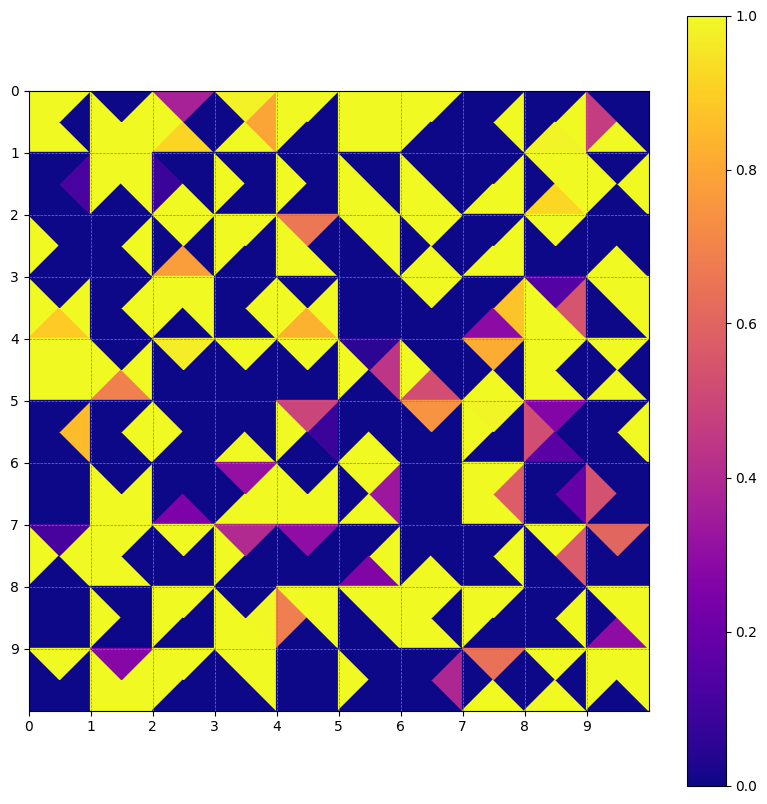

In [33]:

sample = np.array(samples[0].reshape(4, 100).permute(1,0).cpu().clamp(0., 1.))
print(sample.shape)
visualize.visualize_value_map(sample, 10)


['SFFFFFFFFF', 'FFFFFHFFFF', 'FFFFFFFFFH', 'FFFFFFFFFF', 'FHFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFHFFG']


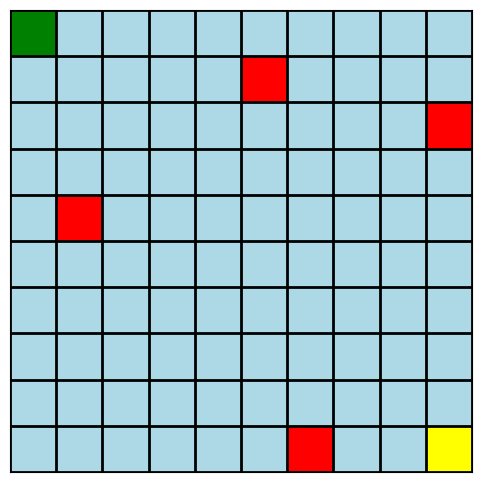

In [16]:
from visualize import visualize_frozen_lake_rectangles
from data_gen import generate_new_map
map = generate_new_map(10, min_holes=4)[0]
print(map)
visualize_frozen_lake_rectangles(map)


In [ ]:
from composition import Conditional, hole_conditional_score
cond_model = Conditional(model, hole_conditional_score, [map])


In [40]:
batch = 25
rs = gen_geometric_progression(.5, .01, 50).to(device)
samples = annealed_langevin_sampling((1, 4, 10, 10), cond_model, rs, 30, device=device)

r = 0.5:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.46237102150917053:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.42757391929626465:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.39539557695388794:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.3656389117240906:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.3381216824054718:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.3126753270626068:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.28914403915405273:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.2673836350440979:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.2472608983516693:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.22865253686904907:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.21144461631774902:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.1955317258834839:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.1808164119720459:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.16720853745937347:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.15462476015090942:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.14298802614212036:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.13222703337669373:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.12227589637041092:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.11307366192340851:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.10456397384405136:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.0966947004199028:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.08941765129566193:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.08268826454877853:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.07646531611680984:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.070710688829422:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.06538914889097214:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.060468096286058426:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.05591738969087601:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.05170916020870209:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.04781763628125191:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.04421897977590561:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.040891148149967194:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.037813764065504074:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.03496797755360603:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.03233635798096657:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.029902789741754532:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.02765236794948578:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.02557130716741085:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.02364686317741871:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.02186724729835987:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.020221563056111336:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.018699729815125465:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.017292426899075508:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.015991033986210823:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.014787580817937851:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.01367469783872366:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.012645568698644638:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.01169388834387064:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.01081383042037487:   0%|          | 0/30 [00:00<?, ?it/s]

r = 0.01000000350177288:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

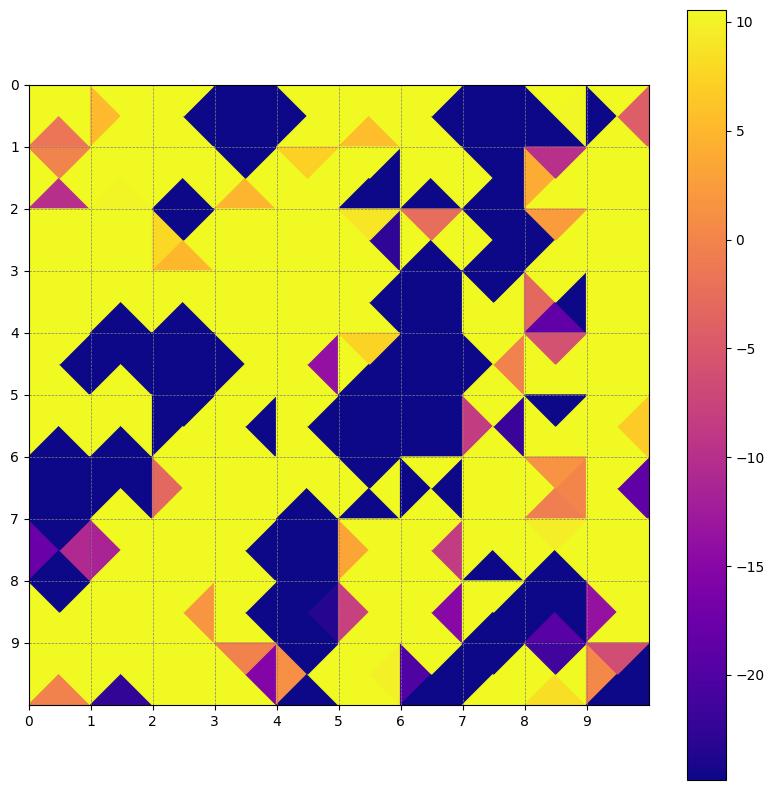

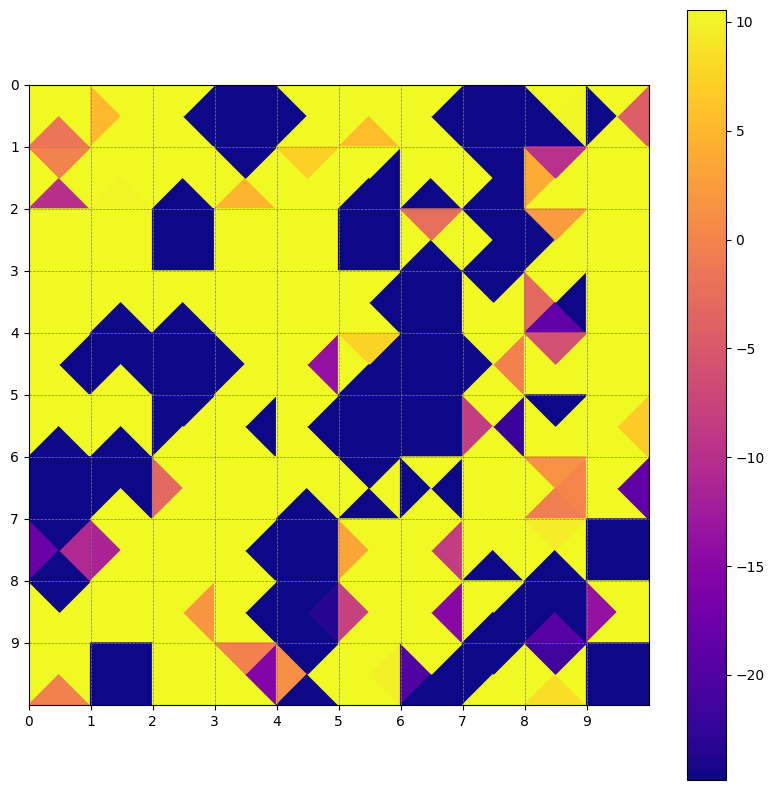

In [41]:

sample = np.array(samples[0].reshape(4, 100).permute(1,0).cpu())
visualize.visualize_value_map(sample, 10)

samples = samples[0][None] + hole_conditional_score(samples[0][None], [map])
sample = np.array(samples[0].reshape(4, 100).permute(1,0).cpu())
visualize.visualize_value_map(sample, 10)

